#### Market Basket Analytics - The Bread Basket dataset

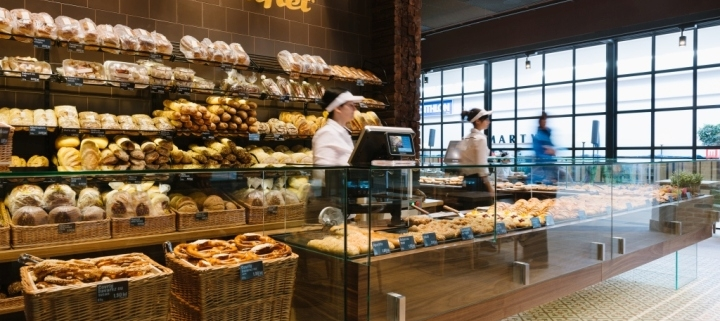

#### Association Rule Learning
- It is a type of unsupervised learning technique that checks for the dependency of one data item on another data item and maps accordingly so that it can be more profitable. It tries to find some interesting relations or associations among the variables of dataset. It is based on different rules to discover the interesting relations between variables in the database.

#### Measures of the effectiveness of association rules
- The strength of a given association rule is measured by three parameters: support, confidence and lift.

#### 1. Support
- Support refers to how often a given rule appears in the database being mined.

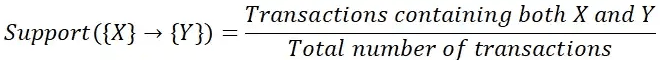

#### 2. Confidence
- Confidence refers to the amount of times a given rule turns out to be true in practice.

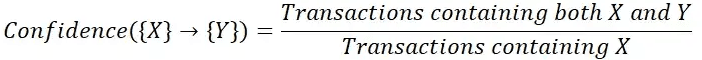

#### 3. Lift
- Lift refers to the ratio of confidence to support. It is the actual rule or algorithm or we can say it is the final model. If the lift value is a negative value, then there is a negative correlation between datapoints. If the value is positive, there is a positive correlation, and if the ratio equals 1, then there is no correlation. 
- As a thumb rule model is acceptable only if the lift value is more than 1.

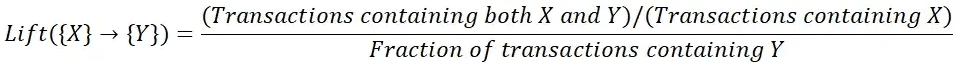

#### Market basket analysis 
- It is a data mining technique used mostly by retailers to increase sales by better understanding customer purchasing patterns involving analysis of datasets, such as purchase history, to reveal product groupings and products that are likely to be purchased together.

#### Objective
- The objective is to analyze a bakery transaction dataset and to discover the association between the objects and common trends in the transactions using Apriori algorithm.

#### Dataset source and brief
- The dataset has been sourced from kaggle and it belongs to "The Bread Basket" a bakery located in Edinburgh. It has 20507 entries and 5 columns.  
- The columns are Transaction (unique identifier for each order made by a customer), Item (lists all the items),date_time (date and time of the transaction), period_day (time period of the day during the transaction) and weekday_weekend (day of transaction categorized as weekday or weekend)

#### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load and read the dataset

In [3]:
df=pd.read_csv(r"C:\Users\manme\Documents\Priya\Stats and ML\Dataset\bread basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


#### Check basic information

In [4]:
df.shape    #check shape

(20507, 5)

In [5]:
df.columns  #check column names

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [6]:
df.info()    #check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
df.isnull().sum()  #check null values

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [8]:
for i in df.columns:      
    print("----------------------", i ,
         "-----------------------")
    print()
    print(set(df[i].tolist()))
    print()

---------------------- Transaction -----------------------

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [9]:
df.describe(include=object)

,Item,date_time,period_day,weekday_weekend
count,20507,20507,20507,20507
unique,94,9182,4,2
top,Coffee,05-02-2017 11:58,afternoon,weekday
freq,5471,12,11569,12807


#### Data Preprocessing

#### 1. Converting date_time into right format 
- This is done for data analysis purpose

In [10]:
datetime=pd.to_datetime(df['date_time'])
df['Day']=datetime.dt.day_name()
df['Month']=datetime.dt.month_name()
df['Year']=datetime.dt.year
df['hour']=datetime.dt.hour
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Day,Month,Year,hour
0,1,Bread,30-10-2016 09:58,morning,weekend,Sunday,October,2016,9
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,Sunday,October,2016,10
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,Sunday,October,2016,10
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,Sunday,October,2016,10
4,3,Jam,30-10-2016 10:07,morning,weekend,Sunday,October,2016,10


#### 2.  Dropping date_time as we have already segregated it

In [11]:
df.drop('date_time', axis = 1, inplace = True)

#### Data Visualization

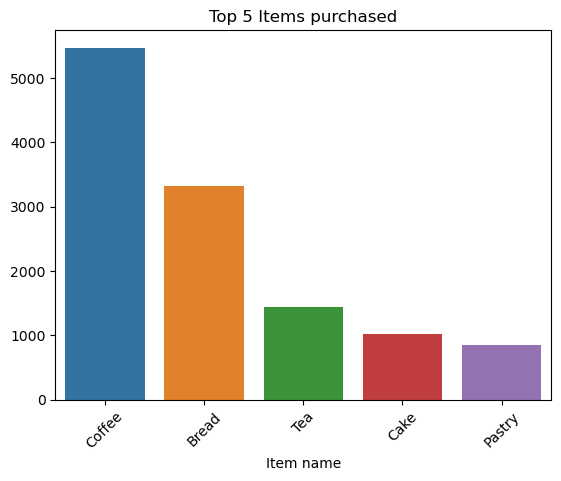

In [13]:
sns.barplot(x = df.Item.value_counts().head(5).index, y = df.Item.value_counts().head(5).values)
plt.xlabel('Item name')
plt.title('Top 5 Items purchased')
plt.xticks(rotation=45)
plt.show()

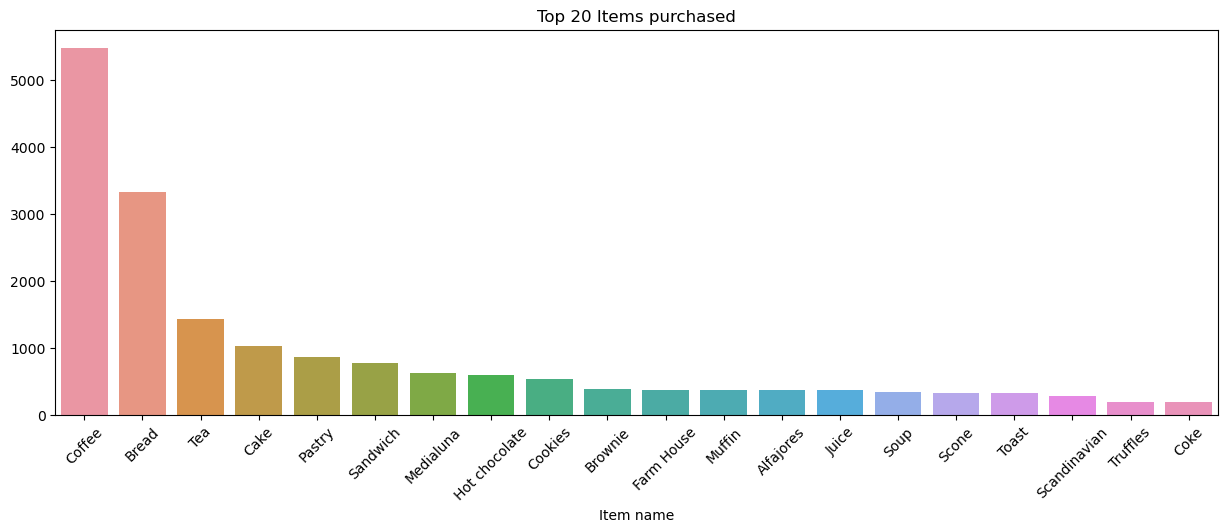

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values)
plt.xlabel('Item name')
plt.title('Top 20 Items purchased')
plt.xticks(rotation=45)
plt.show()

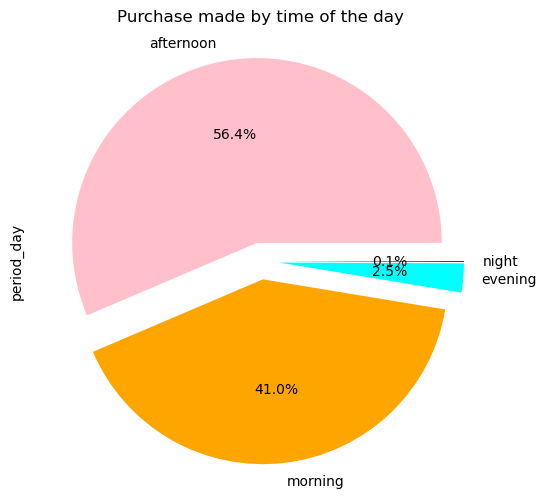

In [23]:
plt.figure(figsize=(6,6))
df['period_day'].value_counts().plot(kind='pie',colors=('pink','orange','cyan','black'),
                                     explode=[0.1,0.1,0.1,0.1],autopct='%0.1f%%')
plt.title('Purchase made by time of the day')
plt.show()

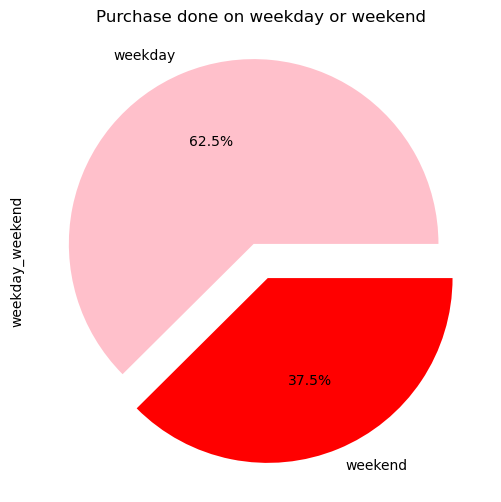

In [31]:
plt.figure(figsize=(6,6))
df['weekday_weekend'].value_counts().plot(kind='pie',colors=('pink','red'),explode=[0.1,0.1],autopct='%0.1f%%')
plt.title('Purchase done on weekday or weekend')
plt.show()

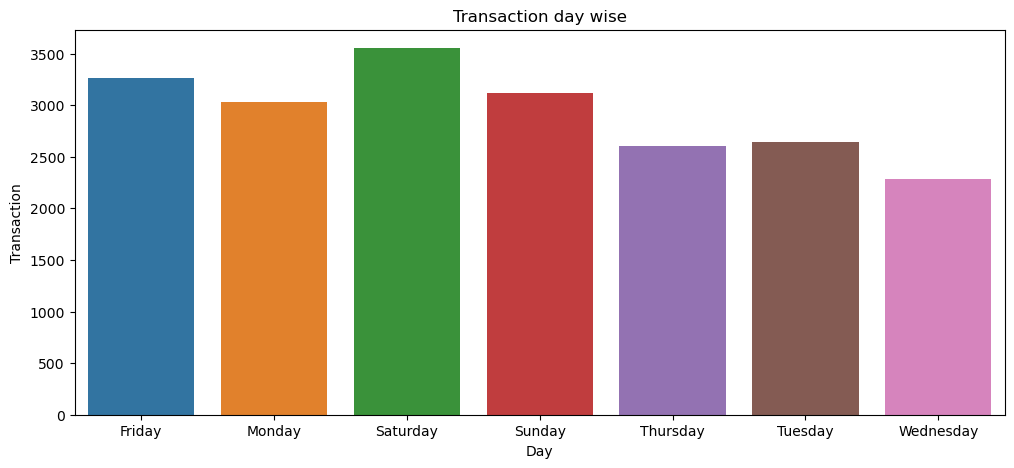

In [32]:
Day=df.groupby('Day')['Transaction'].count().reset_index()
Day.sort_values('Day',inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(x=Day['Day'], y=Day['Transaction'])
plt.xlabel('Day')
plt.ylabel('Transaction')
plt.title('Transaction day wise')
plt.show()

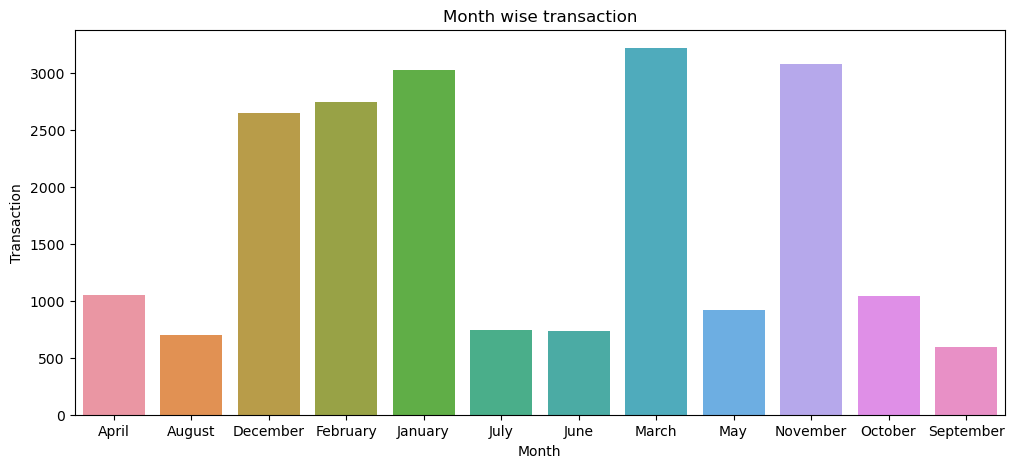

In [24]:
Month=df.groupby('Month')['Transaction'].count().reset_index()
Month.sort_values('Month',inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(x=Month['Month'], y=Month['Transaction'])
plt.xlabel('Month')
plt.ylabel('Transaction')
plt.title('Month wise transaction')
plt.show()

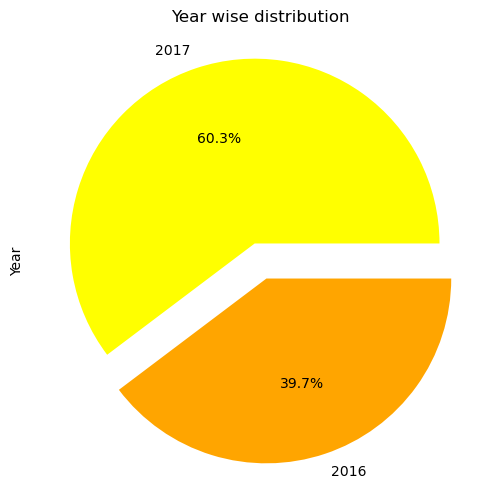

In [33]:
plt.figure(figsize=(6,6))
df['Year'].value_counts().plot(kind='pie',colors=('yellow','orange'),explode=[0.1,0.1],autopct='%0.1f%%')
plt.title('Year wise distribution')
plt.show()

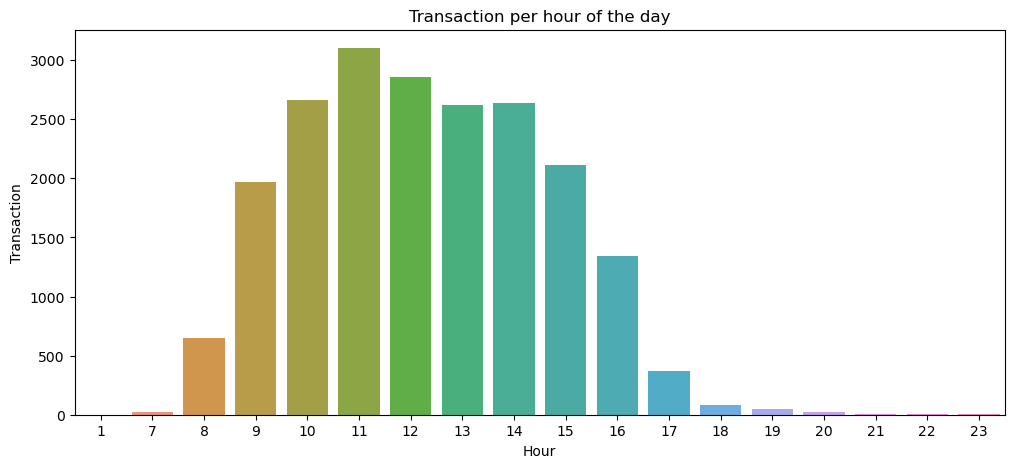

In [21]:
hour=df.groupby('hour')['Transaction'].count().reset_index()
hour.sort_values('hour',inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(x=hour['hour'], y=hour['Transaction'])
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Transaction per hour of the day')
plt.show()

#### Apriori Algorithm model building

#### 1. Selecting the required variables for modelling

In [34]:
dataset = df[["Transaction", "Item"]].sort_values(by = "Item", ascending = False)
dataset

,Transaction,Item
150,69,Victorian Sponge
1487,719,Victorian Sponge
3029,1465,Victorian Sponge
1203,586,Victorian Sponge
104,50,Victorian Sponge
...,...,...
15700,7499,Afternoon with the baker
8997,4534,Afternoon with the baker
10277,5146,Afternoon with the baker
16103,7665,Afternoon with the baker


#### 2. Convert data into transaction list

In [36]:
transactions = [i[1]['Item'].tolist() for i in list(dataset.groupby(['Transaction']))] 

In [37]:
transactions

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Jam', 'Hot chocolate', 'Cookies'],
 ['Muffin'],
 ['Pastry', 'Coffee', 'Bread'],
 ['Pastry', 'Muffin', 'Medialuna'],
 ['Tea', 'Pastry', 'Medialuna', 'Coffee'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna'],
 ['Medialuna', 'Bread', 'Bread'],
 ['Tea', 'Tartine', 'Pastry', 'Jam', 'Coffee'],
 ['Coffee', 'Bread', 'Basket'],
 ['Pastry', 'Medialuna', 'Bread'],
 ['Scandinavian', 'Mineral water'],
 ['Medialuna', 'Coffee', 'Bread'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Medialuna', 'Bread'],
 ['Medialuna', 'Coffee', 'Coffee', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Jam', 'Bread'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Muffin', 'Coffee'],
 ['Scandinavian', 'Muffin'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Tea', 'Bread'],
 ['Scandinavian'],
 ['Tartine', 'Muffin',

#### 3. Model creation

In [44]:
from apyori import apriori

In [69]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.3, min_lift =1, min_length = 2)

In [70]:
rules

<generator object apriori at 0x000001B810DE9380>

In [71]:
results = list(rules) 

In [72]:
results

[RelationRecord(items=frozenset({'Bread'}), support=0.32720549392498677, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread'}), confidence=0.32720549392498677, lift=1.0)]),
 RelationRecord(items=frozenset({'Coffee'}), support=0.47839408346539886, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Coffee'}), confidence=0.47839408346539886, lift=1.0)]),
 RelationRecord(items=frozenset({'Alfajores', 'Coffee'}), support=0.0196513470681458, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Alfajores'}), items_add=frozenset({'Coffee'}), confidence=0.5406976744186046, lift=1.1302348693401265)]),
 RelationRecord(items=frozenset({'Art Tray', 'Coffee'}), support=0.002746962493396725, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Art Tray'}), items_add=frozenset({'Coffee'}), confidence=0.6842105263157895, lift=1.4302236377161985)]),
 RelationRecord(items=frozenset({'Bakewell', 'Coffee'}), support=0.00306

#### Conclusion
- After giving minimum support of 0.02, minimum confidence of 0.3 and minimum lift of 1 following are the group of items having highest lift value:
    - Coke, Coffee & Sandwich has lift value of 4.33546287367406
    - Coffee & Extra Salami or Feta has lift value of 1.7052666449693137
    - Keeping It Local & Coffee has lift value of 1.6921693589096416 
    - Coffee, Juice & Spanish Brunch has  lift value of 1.527546547974993
- Highest lift value of 4.33 is between the pair of Coke, Coffee & Sandwich which means that the likelihood of customer buying Coke, Coffee & Sandwich together is very high.
- All of the above groups have lift value more than 1 indicating a strong correlation between them.